# Homework 7

Billy Nayden

## Import Packages

In [48]:
from nltk.metrics import *
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import requests
import string

In [56]:
# Read in spreadsheet with links
df = pd.read_excel('C:\\Users\\WilliamNayden\\Documents\\MSDS\\20201019_IMDB_Reviews_for_NLP.xlsx')

link_list = df['Link'].tolist()

## 1.	In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.

In [57]:
#set up to remove stopwords
new_stops = list(stopwords.words('english'))

new_stops = new_stops + ['show', 'episode', 'it', 'get', ' it.', 'it\'s', 'series', 'season', 
                         'can', 'no', 've', 'watch', 'watched', 'much', 'lot', 'thus', 'no', 'need', 'needed', 'should\'ve',
                        'it,', 'can.', 'can,']
stop_words = new_stops

In [78]:
output = []

#Append reviews to a list for vectorizer

output = []

#Append reviews to a list for vectorizer

for i in link_list[9:109]:
    lst = []
    page = requests.get(i)
    soup = BeautifulSoup(page.content, 'html.parser')
    span = str(soup.find('div', attrs={'text show-more__control'}).text).strip()
    for i in span.split(' '):
            if i not in stop_words:
                lst.append(i)
    
    span_nostop = ' '.join(lst)
    
    #span_nostop = ' '.join([i for i in span if i not in stop_words])
    #tokenized = word_tokenize(span)
    #tagged = nltk.pos_tag(tokenized)
    #chunked = np.parse(tagged)
    #for subtree in chunked.subtrees():
       # if subtree.label() == 'NP':
            #lst.append(subtree)
    #span = [i for i in span if i not in string.punctuaion]
    output.append(str(span_nostop))

In [79]:
#Check output
output

['I dont understand fan base anymore, people liked Force Awakens, everyone loved Rogue One, The Last Jedi pretty split, Hardly anybody liked Solo.. The Rise Of Skywalker !!!! HOLY COW !!! epic movie !!! perfect way end saga !! one part movie felt cut out, Palaptine back !!!!!!! first moment hear/see EPIC !!! could die hard Star Wars fan ask ???? spoilers here- really liked dealt Reys parents, one fan theorys ( Sortta) think JJ really well ! add onto please fan base, Lovely !!! loved ! ending Beautiful, sad time, again- die hard Star Wars fan- could like ??? Go see movie, love movie, share movie, Star Wars, May The Force Be With You........... Always',
 'This feel like Star Wars. Now, I know people said viewing The Phantom Menace, prequels, despite flaws, delivered picture larger complex galaxy one introduced original trilogy. The prequel characters poorly written, scene direction felt times, Jar Jar existed, end day I\'ll take prequels new Disney films painted universe. They made want 

In [80]:
#create vectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})

In [81]:
#Perform tf-idf on reviews
links_vect = vectorizer.fit_transform(output)

In [82]:
#Look at shape
links_vect.shape

(96, 4800)

In [83]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/modules/clustering.html#k-means
#https://matplotlib.org/tutorials/introductory/pyplot.html
#################################inertia_ is the sum of squared distance from cluster center#################################

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #import matplotlib to examine intracluster distnaces

#Cluster
kmeans = KMeans(n_clusters=5, random_state=11)
clustered = kmeans.fit(links_vect)

Text(0, 0.5, 'Sum of Squared Distance (intracluster)')

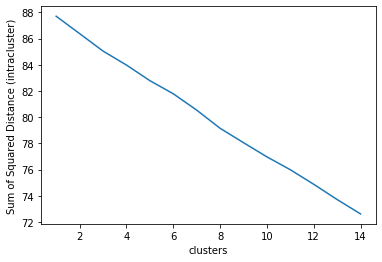

In [86]:
#plot the intracluster distances
plt.plot(range(1,15), dist)
plt.xlabel('clusters')
plt.ylabel('Sum of Squared Distance (intracluster)')

The clusters are not immediately clear, but it looks a bit wobbly at k=5 and k=7

In [87]:
#Examine 5 Clusters
kmeans = KMeans(n_clusters=5, random_state=11)
clustered = kmeans.fit(links_vect)

In [88]:
clustered.labels_

array([4, 1, 3, 3, 3, 4, 1, 2, 3, 3, 0, 3, 3, 3, 1, 3, 4, 1, 3, 4, 3, 1,
       4, 4, 3, 3, 0, 3, 0, 2, 3, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 3, 3,
       0, 1, 3, 3, 3, 3, 2, 3, 0, 3, 1, 3, 3, 0, 4, 3, 0, 0, 0, 4, 0, 0,
       3, 3, 3, 0, 0, 4, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 1, 0, 4, 0, 2,
       1, 1, 0, 1, 1, 0, 1, 1])

In [89]:
clustered.labels_.shape

(96,)

In [90]:
#https://pythonprogramminglanguage.com/kmeans-text-clustering/

#Print top words of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
words = vectorizer.get_feature_names()
for i in range(5):
    print("cluster:", i)
    for j in order_centroids[i, :10]:
        print(words[j])

cluster: 0
the
anakin
wars
star
movie
story
lucas
movies
like
it
cluster: 1
jar
the
movie
character
one
it
even
good
many
hate
cluster: 2
still
amazing
changes
good
bad
cgi
the
movie
edition
great
cluster: 3
film
luke
the
star
wars
movie
great
love
vader
it
cluster: 4
fan
liked
movie
really
die
hard
one
star
the
wars


In [91]:
#Examine 7 Clusters
kmeans = KMeans(n_clusters=7, random_state=11)
clustered = kmeans.fit(links_vect)
clustered.labels_
#https://pythonprogramminglanguage.com/kmeans-text-clustering/

#Print top words of each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
words = vectorizer.get_feature_names()
for i in range(7):
    print("cluster:", i)
    for j in order_centroids[i, :10]:
        print(words[j])

cluster: 0
many
still
aspects
scrolling
heck
user
seen
stated
occasional
average
cluster: 1
anakin
the
wars
movie
clones
star
attack
story
lucas
episode
cluster: 2
movie
jar
the
hate
character
good
ok
one
is
four
cluster: 3
movies
movie
star
wars
the
it
fan
original
liked
like
cluster: 4
even
good
bad
the
still
cgi
best
movie
film
worst
cluster: 5
the
film
star
and
force
it
rey
they
movie
luke
cluster: 6
luke
film
the
star
wars
this
empire
battle
one
love


## 2.	Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact. 

It is hard to find what all these clusters are centered on semantically, but there are some clear patterns. Star Wars as a franchise is divided into three trilogies: the original, the prequels, and the sequels or newest Star Wars movies, post Disney acquisition. It is clear to me that there are clusters that primarily discuss each of these trilogies based on character names like Anakin, Luke, and Rey. Additionally, it appears some clustering is happening based on positive and negative reviews.

## 3.	Explain which of the two clustering results from question 1 is preferable (if one of them is), and why. 

The seven cluster result is preferrable because it makes clearer dilineations between the trilogies. It separates character names in a way that makes it much easier to see which trilogy falls into which cluster. However, I will say that the five cluster method still works well and provides a useful output.